# Midterm Part 1 - _Due Monday, September 19_
---
## Note: this is part of the midterm. It is _not_ a paired programming assignment. **You must complete this lab _on your own_**. 
---
### We'll be exploring the Pokemon dataset from [Kaggle](http://www.kaggle.com).
The dataset was downloaded from https://www.kaggle.com/abcsds/pokemon. 

1. sign up or log in
2. accept terms and conditions (if necessary)
3. download `pokemon.zip`
4. unzip it to your local directory

After loading and cleaning the data:

+ **SQL**: 
    - Which Pokemon seems the most useful (largest `Total` value)?
    - Come up with at least one other question that can be answered using SQL (and answer it).
+ **EDA**: 
    - Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon `#`).
    - Make at least one barplot of a categorical variable
    - Make at least one boxplot of continuous variables
    - "Make at least one boxplot of a continuous variable grouped by a categorical variable”. In other words, for your second boxplot, only one continuous variable need be plotted (against another variable which should be categorical.)
+ **EDA/Statistics**: 
    - Calculate the mean and standard deviation of the `total` column for each Pokemon Type 1.
    - Calculate the mean and standard deviation of at least one other continuous variable
+ **Statistics/Random Sampling** - For the following questions, draw a sample of 100:
    - Compare sample statistics & population statistics for Attack points.
    - Make histograms of the Attack points sample & Attack points population.
    - Compare sample statistics & population statistics for at least one other continuous variable.
    
    For the last problem of Statistics/Random Sampling, make histograms of sample & population for a continuous variable of your choice (ignore the words "Attack points")
    
    - Make histograms of the Attack points sample & at least one other continuous variable in the population.
+ **Probability**: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
     - What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of `Water`)
     - Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

***
## Setup & clean the data
### First, load the packages that will be used in this notebook.

In [12]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

random.seed(1234)
sns.set(font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


### Next, load the csv file into a DataFrame and look at the first few lines.

In [13]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Here are some variable descriptions from the Kaggle website:

|Variable|Description|
|:-:|:--|
|**#**|ID for each pokemon|
|**Name**|Name of each pokemon|
|**Type 1**|Each pokemon has a type, this determines weakness/resistance to attacks|
|**Type 2**|Some pokemon are dual type and have 2|
|**Total**|sum of all stats that come after this, a general guide to how strong a pokemon is|
|**HP**|hit points, or health, defines how much damage a pokemon can withstand before fainting|
|**Attack**|the base modifier for normal attacks (eg. Scratch, Punch)|
|**Defense**|the base damage resistance against normal attacks|
|**SP. Atk**|special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)|
|**SP. Def**|the base damage resistance against special attacks|
|**Speed**|determines which pokemon attacks first each round|
|**Generation**|the number of the generation a pokemon belongs to
|**Legendary**|boolean value indicating if a pokemon is Legendary (True) or not Legendary (False)|

Notice that there are multiple entries for Pokemon \#3 (Venusaur). We won't be able to set `#` as the index since it contains duplicates.

We can also modify the column names to get rid of periods and spaces. The column names should also be lowercased for use with SQLite.

In [14]:
# Lowercase and replace periods & spaces in the column names
new_names = []

for col in df.columns:
    new_names.append(col.replace('.', '', len(col)).replace(' ', '', len(col)).lower())

df.columns = new_names

print(df.columns)

Index(['#', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'spatk', 'spdef', 'speed', 'generation', 'legendary'],
      dtype='object')


Let's also convert `Legendary` to a binary column, where `1` represents `True` and `0` represents `False`.

Python's lambda functions are useful for defining functions in-line. You can read more at:<br>
https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/<br>
http://stackoverflow.com/questions/890128/why-are-python-lambdas-useful

In [15]:
df['legendary'] = df['legendary'].apply(lambda x: 1 if x == True else 0)
df.head()

,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


### Next, load the data into SQL

First we'll need to create a database, then create a table in our new database.

In [16]:
# Create pokemon table in pokemon database (only run this once!)
engine = create_engine('sqlite:///pokemon.db')
conn = engine.connect()
df.to_sql('pokemon', conn)

ValueError: Table 'pokemon' already exists.

In [17]:
%load_ext sql
%sql sqlite:///pokemon.db

/Users/justin/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/justin/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


'Connected: None@pokemon.db'

In [18]:
%%sql
SELECT name FROM sqlite_master WHERE type = "table"

Done.


name
pokemon


SQL:
        Which Pokemon seems the most useful (largest Total value)?
        Come up with at least one other question that can be answered using SQL (and answer it).

In [19]:
%%sql
select max(total), * from pokemon

Done.


max(total),index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
780,163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1


In [20]:
query_result = conn.execute('SELECT name from pokemon order by total ASC limit 1')
min_total = query_result.fetchone()[0]
min_total

'Sunkern'

In [21]:
query_result = conn.execute('SELECT name from pokemon order by total desc limit 1')
min_total = query_result.fetchone()[0]
min_total

'MewtwoMega Mewtwo X'

In [22]:
%%sql
-- which pokemon has the highest speed?
select max(speed), * from pokemon

Done.


max(speed),index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
180,431,386,DeoxysSpeed Forme,Psychic,None,600,50,95,90,95,90,180,3,1


In [23]:
%%sql
select * from pokemon
where type1 = 'Psychic'
order by attack desc
limit 10

Done.


index,#,name,type1,type2,total,hp,attack,defense,spatk,spdef,speed,generation,legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,1
429,386,DeoxysAttack Forme,Psychic,None,600,50,180,20,180,20,150,3,1
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,1
428,386,DeoxysNormal Forme,Psychic,None,600,50,150,50,150,50,150,3,1
526,475,Gallade,Psychic,Fighting,518,68,125,65,65,115,80,4,0
539,482,Azelf,Psychic,None,580,75,125,70,125,70,115,4,1
162,150,Mewtwo,Psychic,None,680,106,110,90,154,90,130,1,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1


EDA:
        Calculate the percent of distinct Pokemon that are Legendary (distinct means unique Pokemon #).
        Make at least one barplot of a categorical variable
        Make at least one boxplot of continuous variables
        "Make at least one boxplot of a continuous variable grouped by a categorical variable”. In other words, for your second boxplot, only one continuous variable need be plotted (against another variable which should be categorical.)

In [24]:
%%sql
select count(distinct [#]) from pokemon
where legendary = '1'

Done.


count(distinct
46


In [25]:
%%sql
select count(distinct [#]) from pokemon

-- there are 46 distinct legendary pokemon out of 721 distinct pokemon
-- hence, 46/721 = .06 of all distinct pokemon are legendary

Done.


count(distinct
721


In [26]:
# loads the data from the pokemon table into a Pandas DataFrame
pokemon_table = %sql SELECT * FROM pokemon;
pokemon = pokemon_table.DataFrame()

Done.


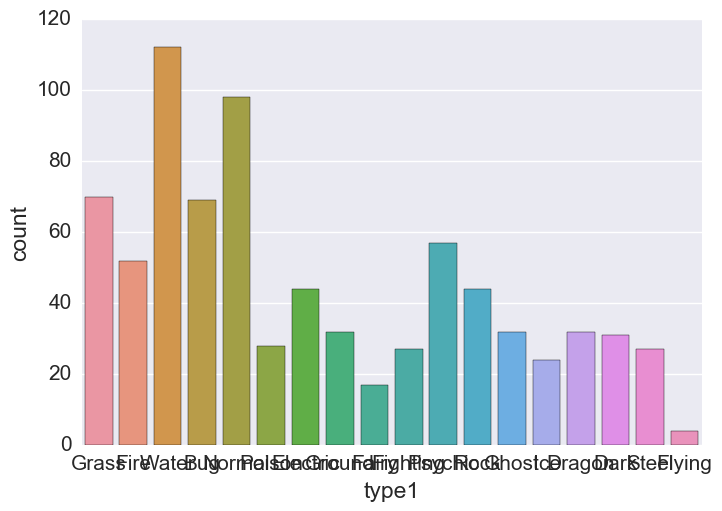

In [27]:
# Make at least one barplot of a categorical variable
sns.countplot(x='type1', data=pokemon);

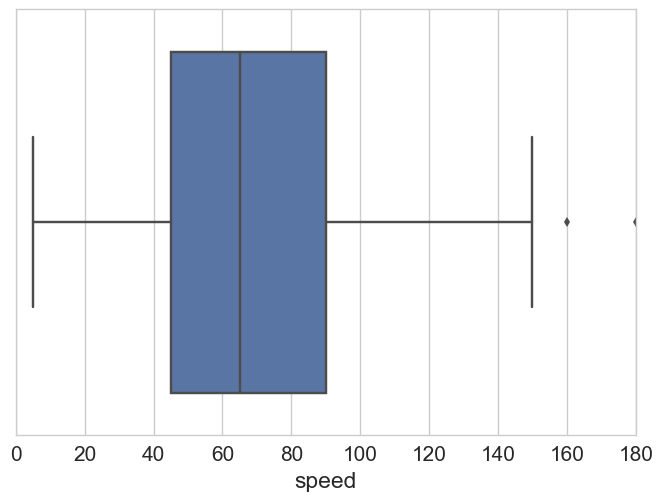

In [28]:
# Make at least one boxplot of continuous variables
sns.set_style("whitegrid")
ax = sns.boxplot(x=pokemon["speed"])

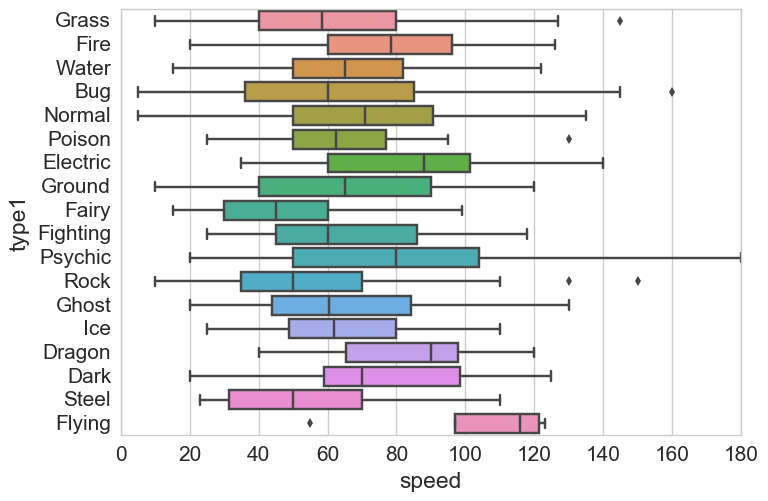

In [29]:
#  "Make at least one boxplot of a continuous variable grouped by a categorical variable”. In other words, for your second boxplot, only one continuous variable need be plotted (against another variable which should be categorical.)

sns.boxplot(df.speed,df.type1)

In [30]:
# EDA/Statistics:
#         Calculate the mean and standard deviation of the total column for each Pokemon Type 1.
#         Calculate the mean and standard deviation of at least one other continuous variable

all_types = pokemon.type1.unique()

for x in all_types:
    print(x)

Grass
Fire
Water
Bug
Normal
Poison
Electric
Ground
Fairy
Fighting
Psychic
Rock
Ghost
Ice
Dragon
Dark
Steel
Flying


In [44]:
%%sql
select STDDEV(total) "Deviation" from pokemon p
where p.type1 = 'Grass'

(sqlite3.OperationalError) no such function: STDDEV [SQL: 'select STDDEV(total) "Deviation" from pokemon p\nwhere p.type1 = \'Grass\'']


In [32]:
df.groupby(['type1'])['total'].mean()

type1
Bug         378.927536
Dark        445.741935
Dragon      550.531250
Electric    443.409091
Fairy       413.176471
Fighting    416.444444
Fire        458.076923
Flying      485.000000
Ghost       439.562500
Grass       421.142857
Ground      437.500000
Ice         433.458333
Normal      401.683673
Poison      399.142857
Psychic     475.947368
Rock        453.750000
Steel       487.703704
Water       430.455357
Name: total, dtype: float64

In [33]:
df.groupby(['type1'])['total'].std()

type1
Bug         117.875223
Dark        109.126217
Dragon      146.267538
Electric    105.721952
Fairy       123.781680
Fighting    102.464378
Fire        109.760496
Flying      161.400124
Ghost       110.072685
Grass       106.650626
Ground      123.913081
Ice         108.281027
Normal      115.733038
Poison       92.358687
Psychic     139.026645
Rock        108.059227
Steel       115.420907
Water       113.188266
Name: total, dtype: float64

In [34]:
df.groupby(['type1'])['spatk'].mean()

type1
Bug         53.869565
Dark        74.645161
Dragon      96.843750
Electric    90.022727
Fairy       78.529412
Fighting    53.111111
Fire        88.980769
Flying      94.250000
Ghost       79.343750
Grass       77.500000
Ground      56.468750
Ice         77.541667
Normal      55.816327
Poison      60.428571
Psychic     98.403509
Rock        63.340909
Steel       67.518519
Water       74.812500
Name: spatk, dtype: float64

In [35]:
df.groupby(['type1'])['spatk'].std()

type1
Bug         26.697055
Dark        33.200952
Dragon      42.257360
Electric    29.740340
Fairy       28.548462
Fighting    28.159345
Fire        30.042121
Flying      34.769479
Ghost       32.561217
Grass       27.244864
Ground      28.135598
Ice         26.604967
Normal      23.946395
Poison      19.322657
Psychic     38.539340
Rock        28.249670
Steel       31.458606
Water       29.030128
Name: spatk, dtype: float64

Statistics/Random Sampling - For the following questions, draw a sample of 100:
        Compare sample statistics & population statistics for Attack points.
        Make histograms of the Attack points sample & Attack points population.

        Compare sample statistics & population statistics for at least one other continuous variable.

        For the last problem of Statistics/Random Sampling, make histograms of sample & population for a continuous variable of your choice (ignore the words "Attack points")

        Make histograms of the Attack points sample & at least one other continuous variable in the population.
        
    Probability: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
        What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of Water)
        Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.

In [36]:
sample_100 = pokemon.sample(n=100)
print("sample: \n", sample_100.describe()['attack'], "\n")
print("population: \n", pokemon.describe()['attack'])

sample: 
 count    100.000000
mean      80.240000
std       33.560475
min        5.000000
25%       55.000000
50%       77.500000
75%      100.000000
max      190.000000
Name: attack, dtype: float64 

population: 
 count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64


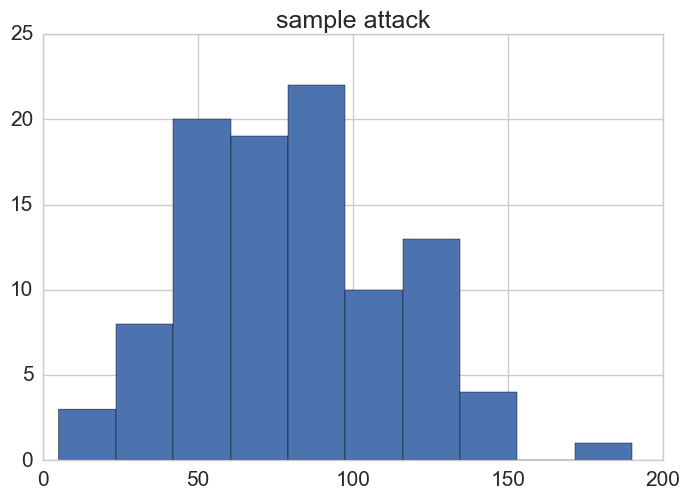

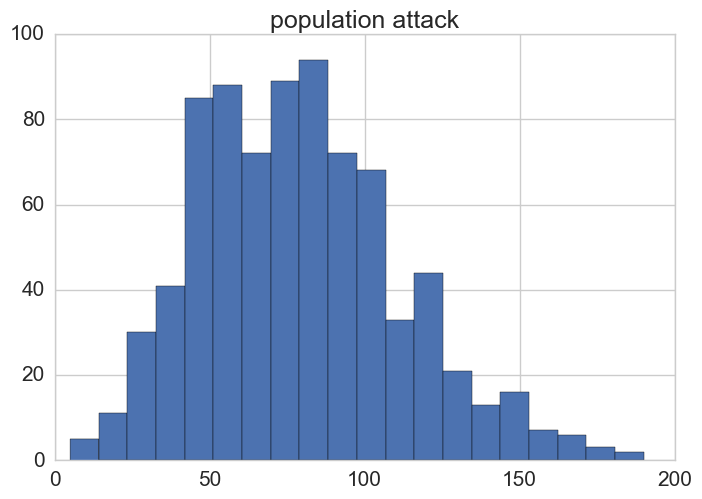

In [37]:
plt.hist(sample_100["attack"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("sample attack")
plt.show()

plt.hist(pokemon["attack"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("population attack")
plt.show()

In [38]:
sample_100 = pokemon.sample(n=100)
print("sample: \n", sample_100.describe()['speed'], "\n")
print("population: \n", pokemon.describe()['speed'])

sample: 
 count    100.000000
mean      67.520000
std       31.797173
min        5.000000
25%       47.250000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64 

population: 
 count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: speed, dtype: float64


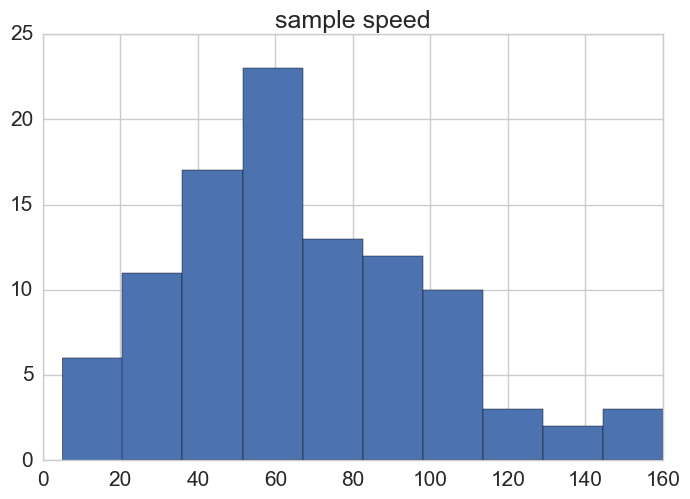

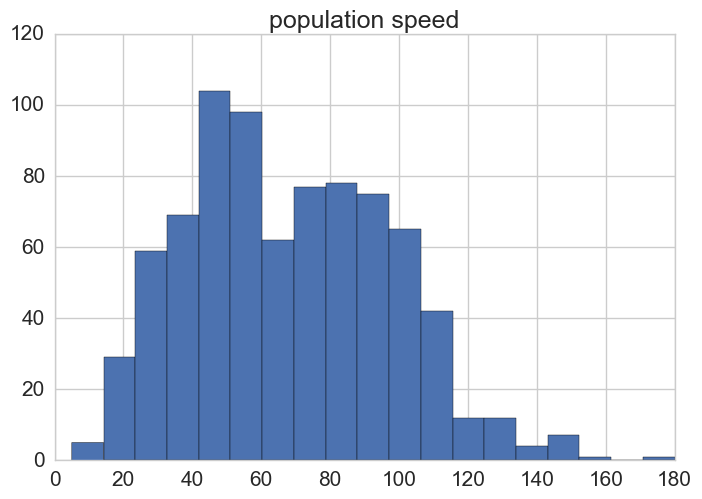

In [39]:
plt.hist(sample_100["speed"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("sample speed")
plt.show()

plt.hist(pokemon["speed"], bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("population speed")
plt.show()

    Probability: Assume you are a Pokemaster and have caught every Pokemon. You pick 6 Pokemon at random to carry.
        What's the probability that they are all Water type? (probability of a Pokemon with Type 1 or Type 2 of Water)
        Come up with at least one more scenario for your set of six Pokemon and compute the probability of getting it.
        

In [40]:
%%sql
select count(*) from pokemon

Done.


count(*)
800


In [41]:
%%sql
select count(*) from pokemon
where
type1 = 'Water' or
type2 = 'Water'

Done.


count(*)
126


In [42]:
%%sql
select count(*) from pokemon
where
type1 = 'Dragon' or
type2 = 'Dragon'

Done.


count(*)
50


In [43]:
from scipy.special import comb

p_6_water = comb(126, 6)/comb(800, 6)
print('{:.7f}'.format(p_6_water))

p_6_dragon = comb(50,6)/comb(800, 6)
print(p_6_dragon)

0.0000138
4.44730945378e-08
